# **Data Analysis using FRED API: Extracting and Analyzing Economic Data**

This document outlines the steps involved in data analysis using the FRED API, focusing on extracting and analyzing economic data. We'll demonstrate the process using unemployment data

## **1. Importing Libraries**

The first step involves importing necessary libraries for data manipulation, analysis, and visualization:

* `pandas:` Used for data manipulation and creating DataFrames.
* `numpy:` Used for numerical computations.
* `matplotlib.pyplot:` Used for creating static plots.
* `plotly.express:` (Optional) Used for creating interactive plots.

In [4]:
!pip install fredapi > /dev/null

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]





## **2. Connecting to FRED API**

We'll establish a connection to the FRED API using your API key. This allows us to retrieve economic data series from the St. Louis Fed database.

In [6]:
from fredapi import Fred


# Replace 'YOUR_API_KEY' with your actual FRED API key
fred = Fred(api_key='YOUR FRED API')


# Example: Get data for the US Unemployment Rate (series ID: UNRATE)
unemployment_data = fred.get_series('UNRATE')

# Print the first 5 data points
print(unemployment_data.head())

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
dtype: float64


## **3. Data Extraction**
Lets try to pull some data from FRED to check if we can pull the data. I have extracted S&P 500 and ploted.


In [7]:
sp_search = fred.search('S&P', order_by = 'popularity')

In [8]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-03-19,2024-03-19,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2024-03-18,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-03-19 08:07:03-05:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-03-19,2024-03-19,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2023-12-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-02-27 08:14:02-06:00,88,"For more information regarding the index, plea..."
SP500,SP500,2024-03-19,2024-03-19,S&P 500,2014-03-19,2024-03-18,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-03-18 19:11:07-05:00,83,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2024-03-19,2024-03-19,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,83,Household data are collected as of March. As ...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-03-19,2024-03-19,ICE BofA US High Yield Index Effective Yield,1996-12-31,2024-03-18,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-03-19 08:07:07-05:00,82,This data represents the effective yield of th...


In [9]:
sp500 = fred.get_series(series_id='SP500')

<Axes: title={'center': 'S&P 500'}>

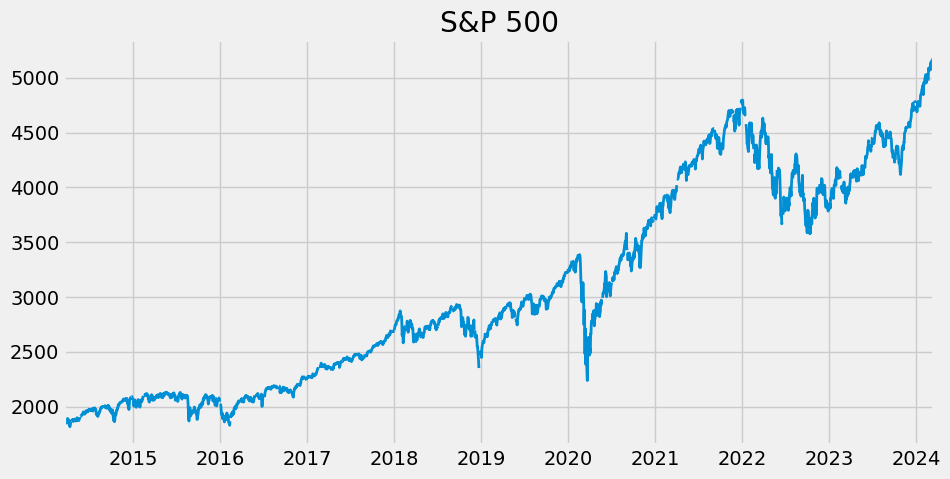

In [10]:
sp500.plot(figsize=(10,5), title='S&P 500', lw=2)

## **4. Data Acquisition from FRED API**

* **Establishing Connection:** The code initiates a conversation with FRED, a vast repository of economic data, using a unique API key. This key acts as a translator, enabling seamless communication.
* **Retrieving Unemployment Data:** The code seeks out unemployment data at both national and state levels. It specifically calls for seasonally adjusted monthly unemployment rates, expressed as percentages.
* **Gathering Participation Data:** Similarly, it requests participation rate data for each state, adhering to the same criteria of monthly frequency, seasonal adjustment, and percentage format.

In [11]:
uemp_results = fred.search('unemployment')

In [12]:
unrate = fred.get_series('UNRATE')

In [13]:
unrate.describe()

count    914.000000
mean       5.700547
std        1.710258
min        2.500000
25%        4.400000
50%        5.500000
75%        6.700000
max       14.800000
dtype: float64

In [14]:
uemp_results

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-03-19,2024-03-19,Unemployment Rate,1948-01-01,2024-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-03-08 08:03:02-06:00,95,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2024-03-19,2024-03-19,Unemployment Rate,1948-01-01,2024-02-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-03-08 08:02:05-06:00,58,The unemployment rate represents the number of...
UNEMPLOY,UNEMPLOY,2024-03-19,2024-03-19,Unemployment Level,1948-01-01,2024-02-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2024-03-08 08:03:05-06:00,71,The series comes from the 'Current Population ...
NROU,NROU,2024-03-19,2024-03-19,Noncyclical Rate of Unemployment,1949-01-01,2034-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2024-02-08 14:46:04-06:00,69,"Starting with the July, 2021 report: An Update..."
CCSA,CCSA,2024-03-19,2024-03-19,Continued Claims (Insured Unemployment),1967-01-07,2024-03-02,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2024-03-14 07:33:04-05:00,74,"Continued claims, also referred to as insured ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LAUMT134234000000003A,LAUMT134234000000003A,2024-03-19,2024-03-19,"Unemployment Rate in Savannah, GA (MSA)",1990-01-01,2022-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2023-05-03 10:36:28-05:00,2,None
LRHUTTTTUSQ156S,LRHUTTTTUSQ156S,2024-03-19,2024-03-19,Harmonized Unemployment: Monthly Rates: Total:...,1960-01-01,2023-10-01,Quarterly,Q,Percent,%,Seasonally Adjusted,SA,2024-01-12 14:02:41-06:00,2,OECD Descriptor ID: LRHUTTTT OECD unit ID: PC ...
SAND706UR,SAND706UR,2024-03-19,2024-03-19,"Unemployment Rate in San Diego-Carlsbad, CA (MSA)",1990-01-01,2024-01-01,Monthly,M,Percent,%,Smoothed Seasonally Adjusted,SSA,2024-03-13 13:32:14-05:00,2,None


{'whiskers': [<matplotlib.lines.Line2D at 0x7825c4659360>,
 'caps': [<matplotlib.lines.Line2D at 0x7825c4658e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7825c4659600>],
 'medians': [<matplotlib.lines.Line2D at 0x7825c46588e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7825c4658640>],
 'means': []}

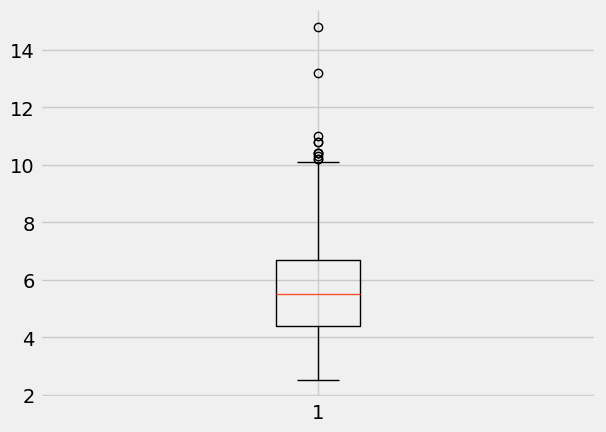

In [15]:
plt.boxplot(unrate)

<Axes: >

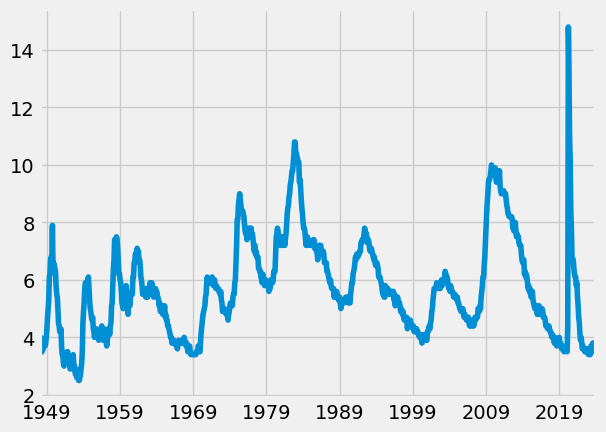

In [16]:
unrate.plot()

## **5. Pulling and Analyzing Unemployment Data**
We are pulling the Unemployment data and perform data cleaning and exploration.

In [17]:
fred.search('unemployment state')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-03-19,2024-03-19,Unemployment Rate,1948-01-01,2024-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-03-08 08:03:02-06:00,95,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2024-03-19,2024-03-19,Unemployment Rate,1948-01-01,2024-02-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-03-08 08:02:05-06:00,58,The unemployment rate represents the number of...
CCSA,CCSA,2024-03-19,2024-03-19,Continued Claims (Insured Unemployment),1967-01-07,2024-03-02,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2024-03-14 07:33:04-05:00,74,"Continued claims, also referred to as insured ..."
CCNSA,CCNSA,2024-03-19,2024-03-19,Continued Claims (Insured Unemployment),1967-01-07,2024-03-02,"Weekly, Ending Saturday",W,Number,Number,Not Seasonally Adjusted,NSA,2024-03-14 07:33:08-05:00,39,"Continued claims, also referred to as insured ..."
UNEMPLOY,UNEMPLOY,2024-03-19,2024-03-19,Unemployment Level,1948-01-01,2024-02-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2024-03-08 08:03:05-06:00,71,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LAUCN518000000000004A,LAUCN518000000000004A,2024-03-19,2024-03-19,"Unemployed Persons in Suffolk City, VA",1990-01-01,2022-01-01,Annual,A,Persons,Persons,Not Seasonally Adjusted,NSA,2023-05-03 10:36:44-05:00,3,These data come from the Current Population Su...
LAUCN540650000000004A,LAUCN540650000000004A,2024-03-19,2024-03-19,"Unemployed Persons in Morgan County, WV",1990-01-01,2022-01-01,Annual,A,Persons,Persons,Not Seasonally Adjusted,NSA,2023-05-03 10:44:01-05:00,3,These data come from the Current Population Su...
LAUCN540650000000004,LAUCN540650000000004,2024-03-19,2024-03-19,"Unemployed Persons in Morgan County, WV",1990-01-01,2024-01-01,Monthly,M,Persons,Persons,Not Seasonally Adjusted,NSA,2024-03-13 10:26:25-05:00,3,These data come from the Current Population Su...


In [18]:
unemp_df = fred.search('unemployment state', filter =('frequency', 'Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-03-19,2024-03-19,Unemployment Rate,1948-01-01,2024-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-03-08 08:03:02-06:00,95,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2024-03-19,2024-03-19,Unemployment Rate - Black or African American,1972-01-01,2024-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-03-08 08:03:04-06:00,72,The series comes from the 'Current Population ...
CAUR,CAUR,2024-03-19,2024-03-19,Unemployment Rate in California,1976-01-01,2024-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-03-11 16:34:02-05:00,64,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2024-03-19,2024-03-19,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,54,Series Is Presented Here As Three Variables--(...
TXUR,TXUR,2024-03-19,2024-03-19,Unemployment Rate in Texas,1976-01-01,2024-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-03-11 16:31:03-05:00,56,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CNEWUR,CNEWUR,2024-03-19,2024-03-19,Unemployment Rate in New England Census Division,1976-01-01,2024-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-03-11 16:32:12-05:00,6,None
LNS14000089,LNS14000089,2024-03-19,2024-03-19,Unemployment Rate - 25-34 Yrs.,1948-01-01,2024-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-03-08 08:03:53-06:00,6,The series comes from the 'Current Population ...
M08311USM156SNBR,M08311USM156SNBR,2024-03-19,2024-03-19,"Unemployment Rate, Married Males, Spouse Prese...",1954-11-01,1968-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:28:17-05:00,6,Beginning In 1960 Data Include Alaska And Hawa...


In [19]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)

In [21]:

# Concatenate the filtered results
concatenated_df = pd.concat(all_results, axis=1)

# Remove columns with names longer than five letters
columns_to_drop = [col for col in concatenated_df.columns if len(col) > 5]
uemp_results = concatenated_df.drop(columns_to_drop, axis=1)

# Check the remaining column names
print(uemp_results.columns)


Index(['CAUR', 'TXUR', 'NYUR', 'FLUR', 'PAUR', 'OHUR', 'MIUR', 'ALUR', 'MAUR',
       'ILUR', 'NCUR', 'NJUR', 'GAUR', 'COUR', 'AZUR', 'WIUR', 'VAUR', 'KYUR',
       'MNUR', 'SCUR', 'NMUR', 'TNUR', 'WAUR', 'MDUR', 'ORUR', 'WVUR', 'NVUR',
       'ARUR', 'OKUR', 'MOUR', 'AKUR', 'IAUR', 'UTUR', 'PRUR', 'INUR', 'LAUR',
       'HIUR', 'NDUR', 'MTUR', 'DCUR', 'MSUR', 'MEUR', 'NEUR', 'CTUR', 'IDUR',
       'NHUR', 'RIUR', 'KSUR', 'WYUR', 'DEUR', 'VTUR', 'SDUR'],
      dtype='object')


In [22]:
uemp_results.tail(50)

,CAUR,TXUR,NYUR,FLUR,PAUR,OHUR,MIUR,ALUR,MAUR,ILUR,NCUR,NJUR,GAUR,COUR,AZUR,WIUR,VAUR,KYUR,MNUR,SCUR,NMUR,TNUR,WAUR,MDUR,ORUR,WVUR,NVUR,ARUR,OKUR,MOUR,AKUR,IAUR,UTUR,PRUR,INUR,LAUR,HIUR,NDUR,MTUR,DCUR,MSUR,MEUR,NEUR,CTUR,IDUR,NHUR,RIUR,KSUR,WYUR,DEUR,VTUR,SDUR
2020-01-01,4.3,3.5,4.1,3.0,4.5,4.4,3.7,3.2,3.0,3.7,3.8,4.0,3.5,3.0,4.8,3.1,2.8,4.1,3.4,2.8,5.1,3.5,3.7,3.3,3.5,5.3,4.2,3.5,3.1,3.4,5.4,2.7,2.5,9.1,3.3,4.8,2.2,2.0,3.6,5.5,5.6,3.2,3.0,3.8,2.8,2.6,3.6,3.1,4.4,3.6,2.0,2.6
2020-02-01,4.4,3.6,4.1,3.0,4.7,4.6,3.7,3.3,3.0,3.9,3.8,4.1,3.6,3.2,4.8,3.1,2.9,4.1,3.5,2.9,5.3,3.5,3.8,3.4,3.6,5.3,4.4,3.6,3.2,3.4,5.5,2.7,2.5,9.1,3.4,4.7,2.2,2.2,3.5,5.7,5.8,3.2,3.0,3.8,2.8,2.6,3.7,3.1,4.6,3.6,2.1,2.5
2020-03-01,5.5,5.0,4.2,4.1,4.9,4.8,3.7,3.4,3.0,5.1,4.0,4.1,3.7,3.3,4.9,3.0,3.2,4.2,3.6,3.1,5.9,3.5,5.2,3.4,3.7,5.4,7.3,4.9,3.2,3.5,5.5,2.6,2.5,NaN,3.5,6.7,2.1,2.4,3.5,5.8,5.9,3.2,4.4,3.9,2.7,2.6,3.7,3.1,4.8,5.0,2.4,2.4
2020-04-01,16.1,12.8,15.6,13.4,16.1,16.5,22.6,13.8,17.4,18.1,14.2,15.0,12.4,11.2,13.8,14.0,12.0,16.8,8.9,11.8,9.0,15.8,16.7,9.0,13.7,15.8,30.6,10.1,12.5,11.6,11.7,11.0,10.0,NaN,16.8,13.5,22.5,8.7,12.0,11.2,15.6,9.3,8.2,8.3,11.8,16.0,17.9,12.1,5.1,13.1,14.1,8.8
2020-05-01,15.8,11.6,16.7,14.2,12.9,12.8,19.2,10.4,14.9,14.7,11.6,15.4,9.8,11.7,11.2,10.6,10.0,12.8,11.2,9.2,9.3,12.1,13.4,8.8,11.8,12.4,24.7,8.9,9.8,9.6,11.8,8.4,7.7,8.9,12.5,12.3,20.8,7.3,9.2,8.8,11.2,9.5,6.4,11.8,9.1,11.8,15.4,9.1,8.7,13.4,9.5,6.6
2020-06-01,13.8,10.1,13.6,11.8,11.3,10.9,14.5,8.6,14.5,12.6,9.7,14.5,8.4,11.2,9.8,8.7,8.9,5.3,8.9,7.8,9.0,10.2,11.5,8.1,10.2,10.5,18.9,7.9,8.2,8.0,11.2,6.8,6.4,8.3,10.3,11.0,17.4,6.4,7.6,8.6,9.4,6.6,5.2,11.5,7.5,9.6,13.3,7.4,7.3,12.7,7.8,5.3
2020-07-01,13.2,9.3,12.5,11.8,10.4,9.8,12.5,7.5,12.6,11.4,8.7,14.4,7.6,6.5,8.9,7.7,8.2,5.8,7.9,7.0,9.0,9.0,10.4,7.8,9.2,9.4,16.7,7.3,7.4,7.2,11.1,5.9,5.7,8.2,8.9,10.4,15.6,6.1,6.7,8.6,8.3,6.3,4.6,11.7,6.6,8.3,12.2,6.7,6.8,7.5,6.7,4.7
2020-08-01,11.9,8.1,10.8,8.8,9.3,8.3,10.0,6.3,10.4,9.7,7.3,13.3,6.7,6.2,7.9,6.4,7.2,5.2,6.7,6.1,8.6,7.6,8.8,7.1,8.0,8.1,13.9,6.4,6.3,6.4,8.6,5.0,4.9,8.3,7.2,9.2,13.1,5.5,5.6,8.4,7.4,4.2,3.9,9.6,5.4,6.7,10.3,5.8,6.2,7.3,5.5,4.0
2020-09-01,10.0,7.7,10.2,8.1,8.8,7.6,8.9,5.9,9.7,9.0,6.7,7.4,6.4,6.3,7.5,5.8,6.6,5.0,6.1,5.8,8.7,7.1,8.1,7.0,7.5,7.5,12.7,6.0,6.0,5.9,7.9,4.6,4.5,8.6,6.5,8.7,13.4,5.2,5.2,8.4,7.1,4.0,3.5,8.8,5.0,6.1,9.9,5.4,5.9,7.5,4.9,3.7
2020-10-01,9.3,7.1,9.2,7.1,8.1,6.8,7.7,5.2,8.5,8.1,6.0,7.1,5.5,6.2,7.0,5.2,5.8,4.8,5.4,5.3,8.4,6.3,7.2,6.6,6.8,6.9,11.2,5.4,5.5,5.4,7.3,4.3,4.0,9.0,5.6,8.0,11.4,4.8,4.6,8.1,6.8,3.8,3.1,7.9,4.4,5.2,7.0,4.9,5.6,5.1,4.4,3.3


<Axes: >

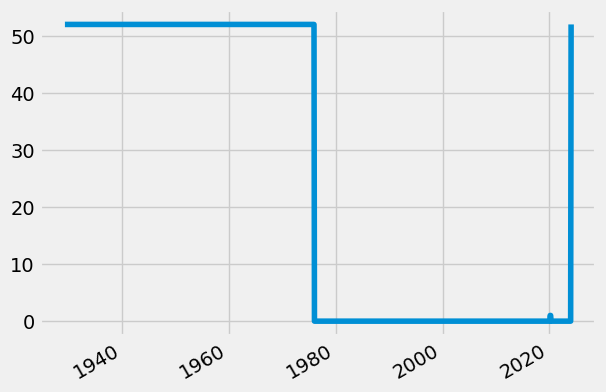

In [23]:
uemp_results.isna().sum(axis=1).plot()

In [24]:
unemp_states = uemp_results.dropna()

In [25]:
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in', '').to_dict()
unemp_states.columns = [id_to_state[c] for c in unemp_states.columns]

## **6. Exploring State-Level Unemployment Data**

In [26]:
# Plot States Unemployment Rate
px.line(unemp_states)

You can observe that there is a spike in graph in 2020 its because of the covid 19 and lockdown. A lot of industry have to layed off there employees.

## **7. Pull May 2020 Unemployment Rate 2020**

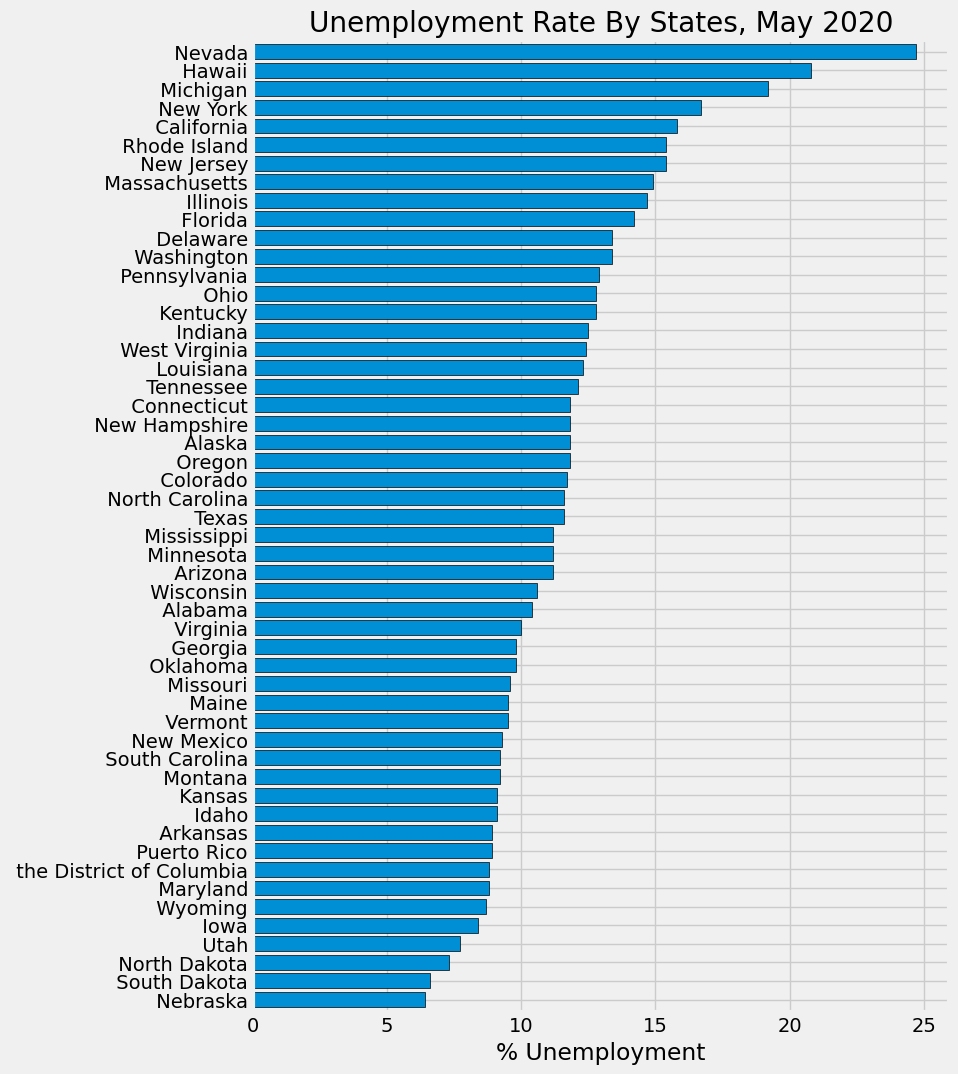

In [27]:
ax = unemp_states.loc[unemp_states.index == '2020-05-01'].T \
 .sort_values('2020-05-01') \
 .plot(kind = 'barh', figsize=(8,12), width=0.8, edgecolor='black',
       title = 'Unemployment Rate By States, May 2020')

ax.legend().remove()
ax.set_xlabel('% Unemployment')
plt.show()


The bar chart shows the Nevada have impacted the most in Unemployment in percentage of Near to 25% and Nebraska the least about 6%. This data is as of March 2024 from FRED. The Precentage of Unemployment also depends on size of the state and other factors like how big the industry is.

## **8. Retrieving Labor Force Participation Data**

* Searching and filtering labor force participation rate data for states.
* Concatenating and cleaning the participation rate data.

In [28]:
part_df = fred.search('Participation rate state', filter =('frequency', 'Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [29]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ', '').to_dict()

all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)


In [30]:
part_id_to_state

{'CIVPART': 'Labor Force Participation Rate',
 'LNS11300060': 'Labor Force Participation Rate - 25-54 Yrs.',
 'LNS11300002': 'Labor Force Participation Rate - Women',
 'LNS11300001': 'Labor Force Participation Rate - Men',
 'LNS11324230': 'Labor Force Participation Rate - 55 Yrs. & over',
 'LNS11300012': 'Labor Force Participation Rate - 16-19 Yrs.',
 'LNS11300006': 'Labor Force Participation Rate - Black or African American',
 'LRAC25MAUSM156S': 'Activity Rate: Aged 25-54: Males for United States',
 'LNS11300036': 'Labor Force Participation Rate - 20-24 Yrs.',
 'LNS11327662': "Labor Force Participation Rate - Bachelor's Degree and Higher, 25 Yrs. & over",
 'LRAC25FEUSM156S': 'Activity Rate: Aged 25-54: Females for United States',
 'LBSSA06': 'California',
 'LNS11300028': 'Labor Force Participation Rate - 20 Yrs. & over, White Men',
 'LNS11300031': 'Labor Force Participation Rate - 20 Yrs. & over, Black or African American Men',
 'LBSSA01': 'Alabama',
 'LNS11300003': 'Labor Force Parti

In [31]:
# Concatenate the filtered results
concatenated_df = pd.concat(all_results, axis=1)

# Remove columns with names longer than five letters
columns_to_drop = [col for col in concatenated_df.columns if len(col) > 7]
part_states = concatenated_df.drop(columns_to_drop, axis=1)

# Check the remaining column names
print(part_states.columns)

Index(['CIVPART', 'LBSSA06', 'LBSSA01', 'LBSSA36', 'LBSSA26', 'LBSSA28',
       'LBSSA48', 'LBSSA12', 'LBSSA21', 'LBSSA39', 'LBSSA55', 'LBSSA42',
       'LBSSA25', 'LBSSA27', 'LBSSA24', 'LBSSA54', 'LBSSA47', 'LBSSA23',
       'LBSSA17', 'LBSSA37', 'LBSSA13', 'LBSSA22', 'LBSSA45', 'LBSSA08',
       'LBSSA49', 'LBSSA51', 'LBSSA18', 'LBSSA29', 'LBSSA34', 'LBSSA19',
       'LBSSA02', 'LBSSA53', 'LBSSA04', 'LBSSA35', 'LBSSA16', 'LBSSA05',
       'LBSSA40', 'LBSSA31', 'LBSSA15', 'LBSSA32', 'LBSSA30', 'LBSSA41',
       'LBSSA33', 'LBSSA50', 'LBSSA09', 'LBSSA38', 'LBSSA46', 'LBSSA20',
       'LBSSA44', 'LBSSA11', 'LBSSA10', 'LBSSA56'],
      dtype='object')


In [32]:
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

In [33]:
part_states = part_states.dropna()


In [34]:
part_states

,Labor Force Participation Rate,California,Alabama,New York,Michigan,Mississippi,Texas,Florida,Kentucky,Ohio,Wisconsin,Pennsylvania,Massachusetts,Minnesota,Maryland,West Virginia,Tennessee,Maine,Illinois,North Carolina,Georgia,Louisiana,South Carolina,Colorado,Utah,Virginia,Indiana,Missouri,New Jersey,Iowa,Alaska,Washington,Arizona,New Mexico,Idaho,Arkansas,Oklahoma,Nebraska,Hawaii,Nevada,Montana,Oregon,New Hampshire,Vermont,Connecticut,North Dakota,South Dakota,Kansas,Rhode Island,District Of Columbia,Delaware,Wyoming
1976-01-01,61.3,62.6,57.0,58.0,61.6,58.8,63.8,55.8,60.5,61.7,65.6,58.4,64.8,65.6,64.3,52.5,59.6,62.1,63.0,66.5,63.7,56.8,65.3,67.2,62.8,65.9,64.0,60.5,61.5,64.4,69.0,60.9,59.5,60.8,63.0,57.9,59.3,64.9,69.9,71.3,62.7,62.9,65.9,63.6,64.2,62.6,64.6,65.1,63.8,64.4,62.7,65.3
1976-02-01,61.3,62.4,56.9,58.0,61.5,58.6,63.5,55.7,60.3,61.7,65.5,58.3,64.7,65.5,64.2,52.4,59.4,61.9,63.0,66.3,63.6,56.6,65.2,67.0,62.6,65.8,63.9,60.3,61.4,64.3,68.4,60.7,59.2,60.5,62.8,57.8,59.2,64.9,69.6,70.8,62.5,62.7,65.6,63.4,64.1,62.4,64.4,65.0,63.7,64.5,62.5,64.9
1976-03-01,61.3,62.2,56.8,58.0,61.5,58.5,63.4,55.5,60.2,61.7,65.4,58.3,64.6,65.4,64.1,52.3,59.3,61.9,62.9,66.2,63.5,56.5,65.0,66.8,62.5,65.6,63.8,60.3,61.4,64.2,67.8,60.6,59.1,60.3,62.7,57.7,59.1,64.8,69.6,70.5,62.4,62.5,65.6,63.2,64.0,62.3,64.4,64.9,63.6,64.5,62.5,64.7
1976-04-01,61.6,62.2,56.8,58.0,61.6,58.5,63.5,55.5,60.1,61.6,65.4,58.3,64.6,65.4,64.1,52.3,59.3,61.8,62.9,66.2,63.5,56.4,64.9,66.6,62.5,65.5,63.8,60.4,61.5,64.1,67.9,60.6,59.1,60.3,62.7,57.7,59.0,64.8,69.4,70.4,62.3,62.4,65.7,63.5,64.1,62.5,64.3,65.0,63.7,64.5,62.4,64.9
1976-05-01,61.5,62.3,56.8,58.1,61.7,58.5,63.6,55.4,60.1,61.6,65.5,58.3,64.6,65.5,64.1,52.2,59.4,61.7,63.0,66.3,63.6,56.4,64.7,66.5,62.6,65.4,63.9,60.6,61.6,64.1,67.9,60.7,59.1,60.3,62.8,57.7,59.0,64.8,69.3,70.5,62.2,62.5,66.0,63.6,64.3,62.6,64.3,65.1,63.6,64.4,62.4,65.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-01,62.8,62.0,57.5,61.4,62.3,53.9,64.5,59.7,57.1,61.9,66.0,62.3,65.0,68.3,65.2,55.2,59.7,59.4,64.5,61.0,61.7,58.6,57.5,68.4,69.7,66.4,63.3,63.2,64.9,67.5,65.4,64.3,62.3,57.3,62.9,57.6,63.3,69.1,60.1,62.9,63.1,62.4,65.1,64.9,64.3,69.1,68.2,66.4,63.7,72.0,61.0,63.8
2023-10-01,62.7,62.1,57.5,61.4,62.3,53.9,64.4,59.6,57.0,61.8,66.0,62.3,65.0,68.1,65.3,55.2,59.6,59.4,64.5,60.9,61.6,58.6,57.4,68.4,69.6,66.5,63.3,63.2,64.8,67.5,65.3,64.3,62.3,57.3,62.9,57.6,63.3,69.0,60.1,62.9,63.1,62.5,65.1,65.0,64.3,69.0,68.1,66.3,63.7,72.1,61.0,63.7
2023-11-01,62.8,62.0,57.5,61.4,62.3,53.8,64.3,59.5,57.0,61.8,66.0,62.3,64.9,68.1,65.2,55.2,59.6,59.4,64.5,60.8,61.5,58.6,57.3,68.3,69.5,66.5,63.2,63.1,64.8,67.4,65.3,64.3,62.3,57.3,62.8,57.6,63.2,68.9,60.1,62.9,63.1,62.5,65.1,65.0,64.3,69.0,68.0,66.3,63.7,72.0,60.9,63.6
2023-12-01,62.5,62.1,57.4,61.5,62.3,53.8,64.2,59.5,56.9,61.8,65.9,62.3,64.9,68.0,65.1,55.2,59.5,59.3,64.5,60.7,61.5,58.6,57.2,68.3,69.4,66.5,63.2,63.1,64.8,67.5,65.3,64.3,62.2,57.3,62.7,57.5,63.1,68.9,60.1,62.8,63.0,62.4,65.1,65.0,64.3,69.0,67.9,66.3,63.7,72.0,60.8,63.6


## **9. Analyzing Unemployment vs. Participation Rates:**

* Comparing unemployment and participation rates for states level.
* Visualizing the trends in unemployment and participation rates for multiple states over time.




In [35]:
unemp_states

,California,Texas,New York,Florida,Pennsylvania,Ohio,Michigan,Alabama,Massachusetts,Illinois,North Carolina,New Jersey,Georgia,Colorado,Arizona,Wisconsin,Virginia,Kentucky,Minnesota,South Carolina,New Mexico,Tennessee,Washington,Maryland,Oregon,West Virginia,Nevada,Arkansas,Oklahoma,Missouri,Alaska,Iowa,Utah,Puerto Rico,Indiana,Louisiana,Hawaii,North Dakota,Montana,the District of Columbia,Mississippi,Maine,Nebraska,Connecticut,Idaho,New Hampshire,Rhode Island,Kansas,Wyoming,Delaware,Vermont,South Dakota
1976-01-01,9.2,5.8,10.3,9.7,8.0,8.1,9.9,6.6,10.5,6.6,6.4,10.3,8.4,5.8,10.2,5.8,6.1,5.6,6.0,7.4,8.6,6.0,8.5,6.4,9.5,7.5,9.2,7.3,5.8,5.9,7.1,4.3,5.8,19.6,6.6,6.3,9.8,3.4,5.8,8.7,6.7,8.7,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3
1976-02-01,9.2,5.8,10.3,9.7,8.1,8.1,9.9,6.6,10.5,6.6,6.4,10.3,8.4,5.7,10.2,5.8,6.1,5.6,6.0,7.4,8.7,6.0,8.5,6.4,9.5,7.5,9.2,7.3,5.8,5.9,7.1,4.3,5.9,19.5,6.6,6.3,9.8,3.4,5.8,8.7,6.7,8.7,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3
1976-03-01,9.1,5.9,10.2,9.6,8.1,8.1,9.9,6.6,10.5,6.6,6.4,10.3,8.4,5.7,10.1,5.7,6.1,5.6,5.9,7.3,8.7,6.0,8.4,6.4,9.4,7.5,9.2,7.3,5.8,5.9,7.0,4.3,5.8,19.3,6.5,6.3,9.8,3.4,5.8,8.6,6.6,8.6,3.3,9.8,5.6,6.5,7.7,4.2,4.1,8.0,8.6,3.2
1976-04-01,9.1,5.9,10.2,9.5,8.1,8.0,9.8,6.5,10.3,6.6,6.3,10.3,8.3,5.6,10.0,5.6,6.0,5.6,5.8,7.2,8.6,6.0,8.5,6.4,9.2,7.5,9.0,7.2,5.8,6.0,6.9,4.2,5.8,19.0,6.3,6.4,9.7,3.5,5.8,8.5,6.4,8.6,3.2,9.6,5.6,6.5,7.7,4.2,4.0,8.1,8.6,3.1
1976-05-01,9.0,5.9,10.1,9.3,8.1,7.8,9.6,6.4,10.1,6.6,6.1,10.3,8.1,5.6,9.8,5.5,5.9,5.5,5.7,7.0,8.6,5.9,8.5,6.5,9.1,7.4,8.9,7.1,5.7,6.0,6.9,4.1,5.7,18.9,6.0,6.5,9.4,3.6,5.8,8.4,6.3,8.5,3.1,9.4,5.6,6.5,7.7,4.2,3.9,8.3,8.5,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-01,5.0,3.9,4.4,3.0,3.3,3.6,4.1,2.7,3.3,4.7,3.6,4.8,3.2,3.3,4.2,3.4,2.9,4.3,2.8,3.0,3.9,3.4,4.3,2.2,3.9,4.3,5.2,3.6,3.5,3.3,4.5,3.1,2.8,5.7,3.5,3.8,3.0,1.9,3.2,4.9,3.2,3.2,2.5,4.0,3.3,2.5,3.2,2.6,2.9,4.1,2.2,2.1
2023-10-01,5.1,3.9,4.6,3.1,3.4,3.6,4.2,2.8,3.4,4.8,3.6,4.8,3.2,3.3,4.2,3.4,3.0,4.3,2.8,3.0,4.0,3.5,4.4,2.3,4.0,4.3,5.3,3.7,3.5,3.3,4.6,3.1,2.8,5.6,3.5,4.0,3.0,1.9,3.3,4.9,3.2,3.4,2.5,4.2,3.3,2.6,3.4,2.6,2.9,4.1,2.3,2.1
2023-11-01,5.1,3.9,4.6,3.1,3.4,3.6,4.1,2.8,3.3,4.7,3.6,4.8,3.2,3.3,4.2,3.4,3.1,4.3,2.7,3.0,4.0,3.5,4.4,2.2,4.0,4.3,5.3,3.7,3.5,3.3,4.6,3.1,2.8,5.6,3.5,4.0,3.0,1.9,3.3,4.9,3.2,3.4,2.5,4.2,3.3,2.6,3.4,2.6,2.9,4.1,2.3,2.1
2023-12-01,5.1,3.9,4.6,3.1,3.4,3.6,4.1,2.8,3.2,4.7,3.6,4.8,3.2,3.3,4.2,3.4,3.0,4.3,2.7,3.0,4.0,3.4,4.4,2.2,4.0,4.3,5.3,3.7,3.5,3.3,4.6,3.0,2.8,5.7,3.5,4.0,3.0,1.9,3.3,4.9,3.2,3.4,2.5,4.2,3.3,2.6,3.4,2.6,2.9,4.1,2.3,2.1


In [36]:
unemp_states = unemp_states.rename(columns={'the District of Columbia':'District Of Columbia'})

In [37]:

# Remove extra spaces from column names
unemp_states.columns = unemp_states.columns.str.strip()


In [38]:
unemp_states = unemp_states.drop(columns=['Puerto Rico'])

In [39]:
unemp_states

,California,Texas,New York,Florida,Pennsylvania,Ohio,Michigan,Alabama,Massachusetts,Illinois,North Carolina,New Jersey,Georgia,Colorado,Arizona,Wisconsin,Virginia,Kentucky,Minnesota,South Carolina,New Mexico,Tennessee,Washington,Maryland,Oregon,West Virginia,Nevada,Arkansas,Oklahoma,Missouri,Alaska,Iowa,Utah,Indiana,Louisiana,Hawaii,North Dakota,Montana,the District of Columbia,Mississippi,Maine,Nebraska,Connecticut,Idaho,New Hampshire,Rhode Island,Kansas,Wyoming,Delaware,Vermont,South Dakota
1976-01-01,9.2,5.8,10.3,9.7,8.0,8.1,9.9,6.6,10.5,6.6,6.4,10.3,8.4,5.8,10.2,5.8,6.1,5.6,6.0,7.4,8.6,6.0,8.5,6.4,9.5,7.5,9.2,7.3,5.8,5.9,7.1,4.3,5.8,6.6,6.3,9.8,3.4,5.8,8.7,6.7,8.7,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3
1976-02-01,9.2,5.8,10.3,9.7,8.1,8.1,9.9,6.6,10.5,6.6,6.4,10.3,8.4,5.7,10.2,5.8,6.1,5.6,6.0,7.4,8.7,6.0,8.5,6.4,9.5,7.5,9.2,7.3,5.8,5.9,7.1,4.3,5.9,6.6,6.3,9.8,3.4,5.8,8.7,6.7,8.7,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3
1976-03-01,9.1,5.9,10.2,9.6,8.1,8.1,9.9,6.6,10.5,6.6,6.4,10.3,8.4,5.7,10.1,5.7,6.1,5.6,5.9,7.3,8.7,6.0,8.4,6.4,9.4,7.5,9.2,7.3,5.8,5.9,7.0,4.3,5.8,6.5,6.3,9.8,3.4,5.8,8.6,6.6,8.6,3.3,9.8,5.6,6.5,7.7,4.2,4.1,8.0,8.6,3.2
1976-04-01,9.1,5.9,10.2,9.5,8.1,8.0,9.8,6.5,10.3,6.6,6.3,10.3,8.3,5.6,10.0,5.6,6.0,5.6,5.8,7.2,8.6,6.0,8.5,6.4,9.2,7.5,9.0,7.2,5.8,6.0,6.9,4.2,5.8,6.3,6.4,9.7,3.5,5.8,8.5,6.4,8.6,3.2,9.6,5.6,6.5,7.7,4.2,4.0,8.1,8.6,3.1
1976-05-01,9.0,5.9,10.1,9.3,8.1,7.8,9.6,6.4,10.1,6.6,6.1,10.3,8.1,5.6,9.8,5.5,5.9,5.5,5.7,7.0,8.6,5.9,8.5,6.5,9.1,7.4,8.9,7.1,5.7,6.0,6.9,4.1,5.7,6.0,6.5,9.4,3.6,5.8,8.4,6.3,8.5,3.1,9.4,5.6,6.5,7.7,4.2,3.9,8.3,8.5,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-01,5.0,3.9,4.4,3.0,3.3,3.6,4.1,2.7,3.3,4.7,3.6,4.8,3.2,3.3,4.2,3.4,2.9,4.3,2.8,3.0,3.9,3.4,4.3,2.2,3.9,4.3,5.2,3.6,3.5,3.3,4.5,3.1,2.8,3.5,3.8,3.0,1.9,3.2,4.9,3.2,3.2,2.5,4.0,3.3,2.5,3.2,2.6,2.9,4.1,2.2,2.1
2023-10-01,5.1,3.9,4.6,3.1,3.4,3.6,4.2,2.8,3.4,4.8,3.6,4.8,3.2,3.3,4.2,3.4,3.0,4.3,2.8,3.0,4.0,3.5,4.4,2.3,4.0,4.3,5.3,3.7,3.5,3.3,4.6,3.1,2.8,3.5,4.0,3.0,1.9,3.3,4.9,3.2,3.4,2.5,4.2,3.3,2.6,3.4,2.6,2.9,4.1,2.3,2.1
2023-11-01,5.1,3.9,4.6,3.1,3.4,3.6,4.1,2.8,3.3,4.7,3.6,4.8,3.2,3.3,4.2,3.4,3.1,4.3,2.7,3.0,4.0,3.5,4.4,2.2,4.0,4.3,5.3,3.7,3.5,3.3,4.6,3.1,2.8,3.5,4.0,3.0,1.9,3.3,4.9,3.2,3.4,2.5,4.2,3.3,2.6,3.4,2.6,2.9,4.1,2.3,2.1
2023-12-01,5.1,3.9,4.6,3.1,3.4,3.6,4.1,2.8,3.2,4.7,3.6,4.8,3.2,3.3,4.2,3.4,3.0,4.3,2.7,3.0,4.0,3.4,4.4,2.2,4.0,4.3,5.3,3.7,3.5,3.3,4.6,3.0,2.8,3.5,4.0,3.0,1.9,3.3,4.9,3.2,3.4,2.5,4.2,3.3,2.6,3.4,2.6,2.9,4.1,2.3,2.1


In [40]:
part_states = part_states.drop('Labor Force Participation Rate', axis=1)
part_states

,California,Alabama,New York,Michigan,Mississippi,Texas,Florida,Kentucky,Ohio,Wisconsin,Pennsylvania,Massachusetts,Minnesota,Maryland,West Virginia,Tennessee,Maine,Illinois,North Carolina,Georgia,Louisiana,South Carolina,Colorado,Utah,Virginia,Indiana,Missouri,New Jersey,Iowa,Alaska,Washington,Arizona,New Mexico,Idaho,Arkansas,Oklahoma,Nebraska,Hawaii,Nevada,Montana,Oregon,New Hampshire,Vermont,Connecticut,North Dakota,South Dakota,Kansas,Rhode Island,District Of Columbia,Delaware,Wyoming
1976-01-01,62.6,57.0,58.0,61.6,58.8,63.8,55.8,60.5,61.7,65.6,58.4,64.8,65.6,64.3,52.5,59.6,62.1,63.0,66.5,63.7,56.8,65.3,67.2,62.8,65.9,64.0,60.5,61.5,64.4,69.0,60.9,59.5,60.8,63.0,57.9,59.3,64.9,69.9,71.3,62.7,62.9,65.9,63.6,64.2,62.6,64.6,65.1,63.8,64.4,62.7,65.3
1976-02-01,62.4,56.9,58.0,61.5,58.6,63.5,55.7,60.3,61.7,65.5,58.3,64.7,65.5,64.2,52.4,59.4,61.9,63.0,66.3,63.6,56.6,65.2,67.0,62.6,65.8,63.9,60.3,61.4,64.3,68.4,60.7,59.2,60.5,62.8,57.8,59.2,64.9,69.6,70.8,62.5,62.7,65.6,63.4,64.1,62.4,64.4,65.0,63.7,64.5,62.5,64.9
1976-03-01,62.2,56.8,58.0,61.5,58.5,63.4,55.5,60.2,61.7,65.4,58.3,64.6,65.4,64.1,52.3,59.3,61.9,62.9,66.2,63.5,56.5,65.0,66.8,62.5,65.6,63.8,60.3,61.4,64.2,67.8,60.6,59.1,60.3,62.7,57.7,59.1,64.8,69.6,70.5,62.4,62.5,65.6,63.2,64.0,62.3,64.4,64.9,63.6,64.5,62.5,64.7
1976-04-01,62.2,56.8,58.0,61.6,58.5,63.5,55.5,60.1,61.6,65.4,58.3,64.6,65.4,64.1,52.3,59.3,61.8,62.9,66.2,63.5,56.4,64.9,66.6,62.5,65.5,63.8,60.4,61.5,64.1,67.9,60.6,59.1,60.3,62.7,57.7,59.0,64.8,69.4,70.4,62.3,62.4,65.7,63.5,64.1,62.5,64.3,65.0,63.7,64.5,62.4,64.9
1976-05-01,62.3,56.8,58.1,61.7,58.5,63.6,55.4,60.1,61.6,65.5,58.3,64.6,65.5,64.1,52.2,59.4,61.7,63.0,66.3,63.6,56.4,64.7,66.5,62.6,65.4,63.9,60.6,61.6,64.1,67.9,60.7,59.1,60.3,62.8,57.7,59.0,64.8,69.3,70.5,62.2,62.5,66.0,63.6,64.3,62.6,64.3,65.1,63.6,64.4,62.4,65.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-01,62.0,57.5,61.4,62.3,53.9,64.5,59.7,57.1,61.9,66.0,62.3,65.0,68.3,65.2,55.2,59.7,59.4,64.5,61.0,61.7,58.6,57.5,68.4,69.7,66.4,63.3,63.2,64.9,67.5,65.4,64.3,62.3,57.3,62.9,57.6,63.3,69.1,60.1,62.9,63.1,62.4,65.1,64.9,64.3,69.1,68.2,66.4,63.7,72.0,61.0,63.8
2023-10-01,62.1,57.5,61.4,62.3,53.9,64.4,59.6,57.0,61.8,66.0,62.3,65.0,68.1,65.3,55.2,59.6,59.4,64.5,60.9,61.6,58.6,57.4,68.4,69.6,66.5,63.3,63.2,64.8,67.5,65.3,64.3,62.3,57.3,62.9,57.6,63.3,69.0,60.1,62.9,63.1,62.5,65.1,65.0,64.3,69.0,68.1,66.3,63.7,72.1,61.0,63.7
2023-11-01,62.0,57.5,61.4,62.3,53.8,64.3,59.5,57.0,61.8,66.0,62.3,64.9,68.1,65.2,55.2,59.6,59.4,64.5,60.8,61.5,58.6,57.3,68.3,69.5,66.5,63.2,63.1,64.8,67.4,65.3,64.3,62.3,57.3,62.8,57.6,63.2,68.9,60.1,62.9,63.1,62.5,65.1,65.0,64.3,69.0,68.0,66.3,63.7,72.0,60.9,63.6
2023-12-01,62.1,57.4,61.5,62.3,53.8,64.2,59.5,56.9,61.8,65.9,62.3,64.9,68.0,65.1,55.2,59.5,59.3,64.5,60.7,61.5,58.6,57.2,68.3,69.4,66.5,63.2,63.1,64.8,67.5,65.3,64.3,62.2,57.3,62.7,57.5,63.1,68.9,60.1,62.8,63.0,62.4,65.1,65.0,64.3,69.0,67.9,66.3,63.7,72.0,60.8,63.6


In [41]:
unemp_states.rename(columns={'the District of Columbia': 'District Of Columbia'}, inplace=True)

In [42]:
part_states.columns

Index(['California', 'Alabama', 'New York', 'Michigan', 'Mississippi', 'Texas',
       'Florida', 'Kentucky', 'Ohio', 'Wisconsin', 'Pennsylvania',
       'Massachusetts', 'Minnesota', 'Maryland', 'West Virginia', 'Tennessee',
       'Maine', 'Illinois', 'North Carolina', 'Georgia', 'Louisiana',
       'South Carolina', 'Colorado', 'Utah', 'Virginia', 'Indiana', 'Missouri',
       'New Jersey', 'Iowa', 'Alaska', 'Washington', 'Arizona', 'New Mexico',
       'Idaho', 'Arkansas', 'Oklahoma', 'Nebraska', 'Hawaii', 'Nevada',
       'Montana', 'Oregon', 'New Hampshire', 'Vermont', 'Connecticut',
       'North Dakota', 'South Dakota', 'Kansas', 'Rhode Island',
       'District Of Columbia', 'Delaware', 'Wyoming'],
      dtype='object')

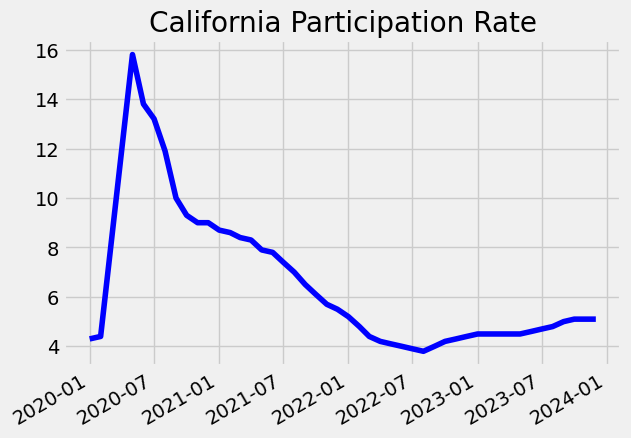

In [43]:
# fig, ax = plt.subplots()
# unemp_states.query('index >= 2020 and index < 2024')['California'].plot(ax=ax, label='Participation', color='blue')
# plt.title('California Participation Rate')
# plt.grid(True)
# plt.show()

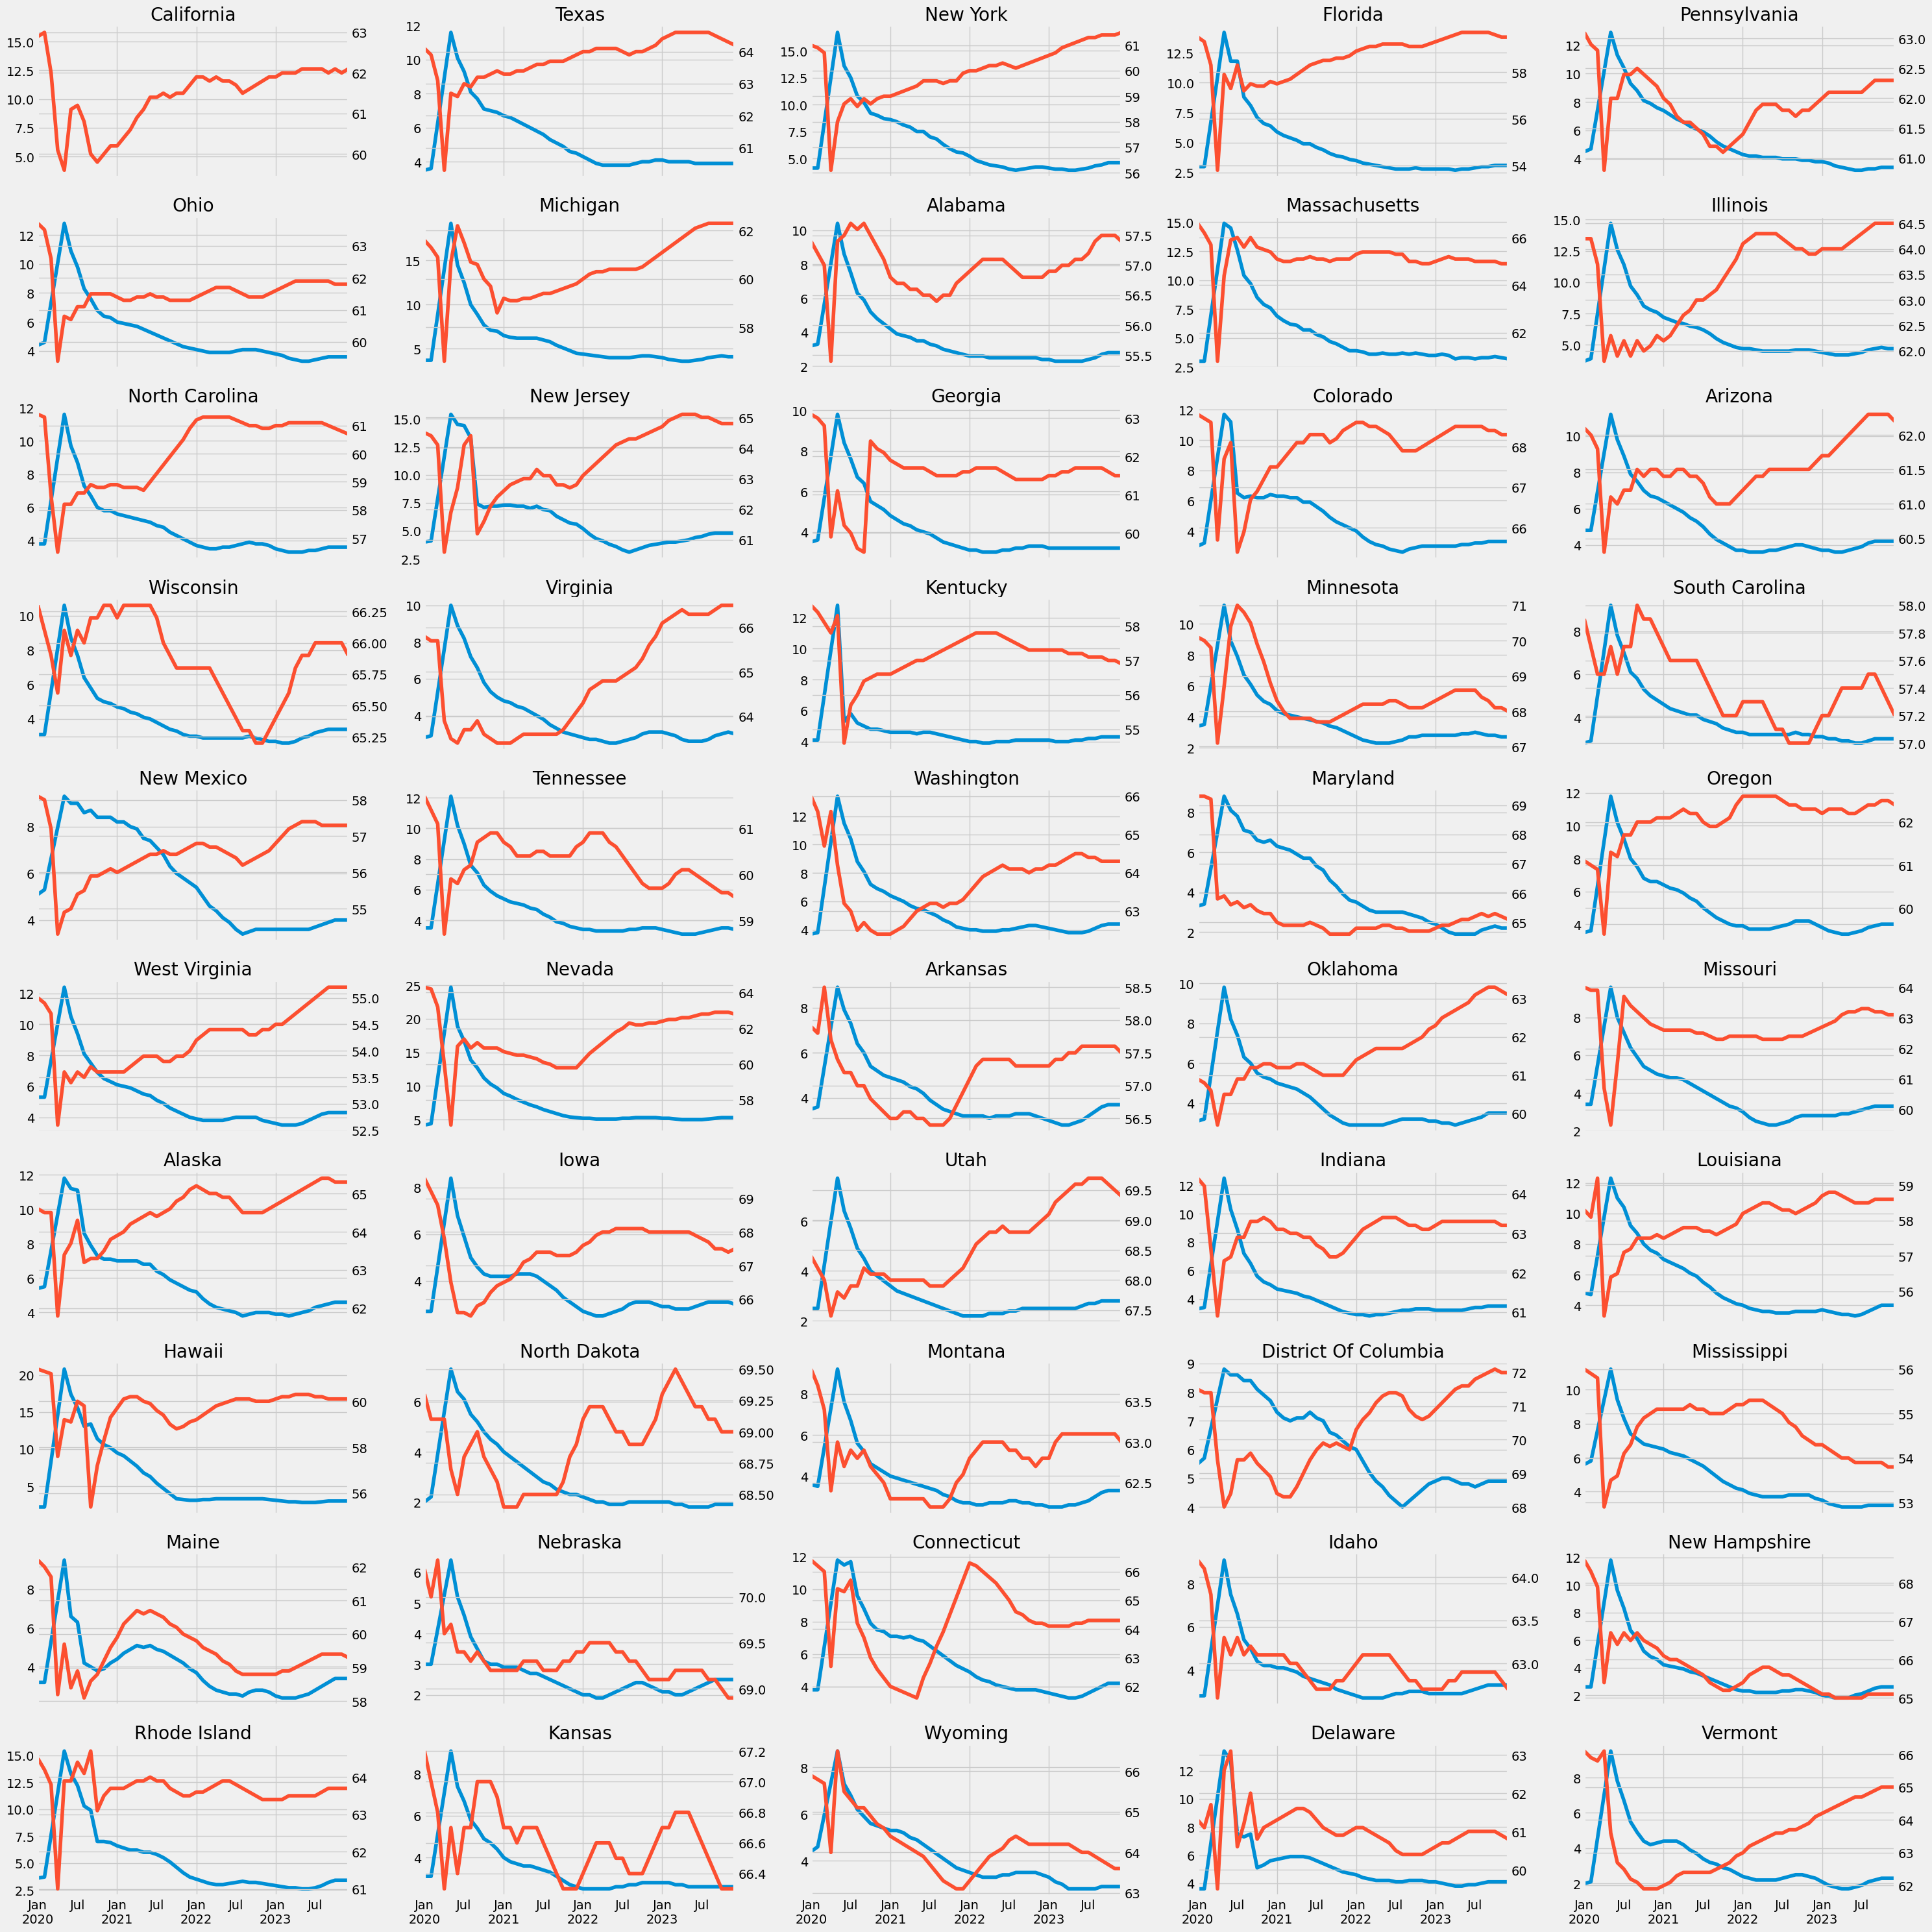

In [44]:
fig, axs = plt.subplots(10,5, figsize=(30, 30), sharex = True)
axs = axs.flatten()

for i in range(len(axs)):
    state = unemp_states.columns[i]
    ax2 = axs[i].twinx()
    unemp_states.query('index >= 2020 and index < 2024')[state].plot(ax = axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2024')[state].plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(True)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()


We observe that out of the states the Unemployment rate and Participation rate are extreamly varying.

In [45]:
# part_states.query('index >= 2020 and index < 2024')['California'].head()

2020-01-01    62.9
2020-02-01    63.0
2020-03-01    62.0
2020-04-01    60.1
2020-05-01    59.6
Freq: MS, Name: California, dtype: float64

In [46]:
part_states

,California,Alabama,New York,Michigan,Mississippi,Texas,Florida,Kentucky,Ohio,Wisconsin,Pennsylvania,Massachusetts,Minnesota,Maryland,West Virginia,Tennessee,Maine,Illinois,North Carolina,Georgia,Louisiana,South Carolina,Colorado,Utah,Virginia,Indiana,Missouri,New Jersey,Iowa,Alaska,Washington,Arizona,New Mexico,Idaho,Arkansas,Oklahoma,Nebraska,Hawaii,Nevada,Montana,Oregon,New Hampshire,Vermont,Connecticut,North Dakota,South Dakota,Kansas,Rhode Island,District Of Columbia,Delaware,Wyoming
1976-01-01,62.6,57.0,58.0,61.6,58.8,63.8,55.8,60.5,61.7,65.6,58.4,64.8,65.6,64.3,52.5,59.6,62.1,63.0,66.5,63.7,56.8,65.3,67.2,62.8,65.9,64.0,60.5,61.5,64.4,69.0,60.9,59.5,60.8,63.0,57.9,59.3,64.9,69.9,71.3,62.7,62.9,65.9,63.6,64.2,62.6,64.6,65.1,63.8,64.4,62.7,65.3
1976-02-01,62.4,56.9,58.0,61.5,58.6,63.5,55.7,60.3,61.7,65.5,58.3,64.7,65.5,64.2,52.4,59.4,61.9,63.0,66.3,63.6,56.6,65.2,67.0,62.6,65.8,63.9,60.3,61.4,64.3,68.4,60.7,59.2,60.5,62.8,57.8,59.2,64.9,69.6,70.8,62.5,62.7,65.6,63.4,64.1,62.4,64.4,65.0,63.7,64.5,62.5,64.9
1976-03-01,62.2,56.8,58.0,61.5,58.5,63.4,55.5,60.2,61.7,65.4,58.3,64.6,65.4,64.1,52.3,59.3,61.9,62.9,66.2,63.5,56.5,65.0,66.8,62.5,65.6,63.8,60.3,61.4,64.2,67.8,60.6,59.1,60.3,62.7,57.7,59.1,64.8,69.6,70.5,62.4,62.5,65.6,63.2,64.0,62.3,64.4,64.9,63.6,64.5,62.5,64.7
1976-04-01,62.2,56.8,58.0,61.6,58.5,63.5,55.5,60.1,61.6,65.4,58.3,64.6,65.4,64.1,52.3,59.3,61.8,62.9,66.2,63.5,56.4,64.9,66.6,62.5,65.5,63.8,60.4,61.5,64.1,67.9,60.6,59.1,60.3,62.7,57.7,59.0,64.8,69.4,70.4,62.3,62.4,65.7,63.5,64.1,62.5,64.3,65.0,63.7,64.5,62.4,64.9
1976-05-01,62.3,56.8,58.1,61.7,58.5,63.6,55.4,60.1,61.6,65.5,58.3,64.6,65.5,64.1,52.2,59.4,61.7,63.0,66.3,63.6,56.4,64.7,66.5,62.6,65.4,63.9,60.6,61.6,64.1,67.9,60.7,59.1,60.3,62.8,57.7,59.0,64.8,69.3,70.5,62.2,62.5,66.0,63.6,64.3,62.6,64.3,65.1,63.6,64.4,62.4,65.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-01,62.0,57.5,61.4,62.3,53.9,64.5,59.7,57.1,61.9,66.0,62.3,65.0,68.3,65.2,55.2,59.7,59.4,64.5,61.0,61.7,58.6,57.5,68.4,69.7,66.4,63.3,63.2,64.9,67.5,65.4,64.3,62.3,57.3,62.9,57.6,63.3,69.1,60.1,62.9,63.1,62.4,65.1,64.9,64.3,69.1,68.2,66.4,63.7,72.0,61.0,63.8
2023-10-01,62.1,57.5,61.4,62.3,53.9,64.4,59.6,57.0,61.8,66.0,62.3,65.0,68.1,65.3,55.2,59.6,59.4,64.5,60.9,61.6,58.6,57.4,68.4,69.6,66.5,63.3,63.2,64.8,67.5,65.3,64.3,62.3,57.3,62.9,57.6,63.3,69.0,60.1,62.9,63.1,62.5,65.1,65.0,64.3,69.0,68.1,66.3,63.7,72.1,61.0,63.7
2023-11-01,62.0,57.5,61.4,62.3,53.8,64.3,59.5,57.0,61.8,66.0,62.3,64.9,68.1,65.2,55.2,59.6,59.4,64.5,60.8,61.5,58.6,57.3,68.3,69.5,66.5,63.2,63.1,64.8,67.4,65.3,64.3,62.3,57.3,62.8,57.6,63.2,68.9,60.1,62.9,63.1,62.5,65.1,65.0,64.3,69.0,68.0,66.3,63.7,72.0,60.9,63.6
2023-12-01,62.1,57.4,61.5,62.3,53.8,64.2,59.5,56.9,61.8,65.9,62.3,64.9,68.0,65.1,55.2,59.5,59.3,64.5,60.7,61.5,58.6,57.2,68.3,69.4,66.5,63.2,63.1,64.8,67.5,65.3,64.3,62.2,57.3,62.7,57.5,63.1,68.9,60.1,62.8,63.0,62.4,65.1,65.0,64.3,69.0,67.9,66.3,63.7,72.0,60.8,63.6


## **10. Creating Interactive Visualizations:**

* Introduction to Plotly and its capabilities for interactive visualizations.
* Building an interactive plot to visualize unemployment and participation rates by state.

In [47]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Function to create interactive plot
def plot_interactive(unemp_states, part_states):
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    # Add traces for unemployment rates
    for state in unemp_states.columns:
        unemp_data = unemp_states[state].loc['2020-01-01':'2024-01-01']  # Filter data for 2020 to 2022
        fig.add_trace(go.Scatter(x=unemp_data.index, y=unemp_data.values, mode='lines', name=f'{state} - Unemployment'), secondary_y=False)

    # Add traces for participation rates
    for state in part_states.columns:
        part_data = part_states[state].loc['2020-01-01':'2024-01-01']  # Filter data for 2020 to 2022
        fig.add_trace(go.Scatter(x=part_data.index, y=part_data.values, mode='lines', name=f'{state} - Participation'), secondary_y=True)

    # Add dropdown menu for selecting state
    state_dropdown = [{"label": state, "method": "update", "args": [{"visible": [state == col for col in unemp_states.columns]}, {"title": f"{state}"}]} for state in unemp_states.columns]
    fig.update_layout(
        updatemenus=[{"buttons": state_dropdown, "direction": "down", "showactive": True, "x": 0.5, "xanchor": "center", "y": 1.05, "yanchor": "bottom"}]
    )

    # Update layout
    fig.update_layout(title="Unemployment and Participation Rates by State (2020-2022)",
                      xaxis_title="Date",
                      yaxis_title="Unemployment Rate",
                      yaxis2_title="Participation Rate",
                      legend_title="Legend",
                      showlegend=True,
                      width=1000,
                      height=600,
                      xaxis=dict(showgrid=False),  # Remove x-axis grid
                      yaxis=dict(showgrid=False),  # Remove y-axis grid
                      yaxis2=dict(showgrid=False))  # Remove secondary y-axis grid

    return fig

# Plot the interactive chart
interactive_plot = plot_interactive(unemp_states, part_states)
interactive_plot.show()


As we can see plotly have capabilities for an interactive visuals and impactful tools for tweek the results with interactive filters.

## **10. Conclusion**


In summary, this project involved extracting unemployment data and labor force participation data from FRED using its API, followed by data cleaning and processing for analysis to examine the relationship between the two variables.

Throughout the analysis, various data cleaning techniques were employed, and visualizations such as box plots and line charts were utilized to gain insights into the data. Statistical methods like calculating mean, median, and other summary statistics provided further understanding of the dataset.

Moreover, interactive visualizations using Plotly enhanced the exploratory process, allowing for more dynamic and interactive exploration of the data.

Moving forward, there are ample opportunities for further data analysis and exploration. I encourage continued exploration of the data to uncover additional insights, discover hidden patterns, and delve deeper into understanding the dynamics of unemployment and labor force participation.

We have made numerious data analysis methods in this projects like:

* `Descriptive Analysis:`
Summarized national unemployment rate statistics.
Visualized national unemployment rate trends using box plots and time series plots.

* `Exploratory Data Analysis (EDA):`
Explored state-level unemployment and labor force participation data.
Cleaned and prepared data for analysis.

* `Comparative Analysis:`
Compared unemployment and labor force participation rates across states.
Analyzed the relationship between unemployment and participation rates.

* `Temporal Analysis:`
Examined temporal trends in unemployment and participation rates.
Focused on specific time periods, such as May 2020.

* `Interactive Analysis:`
Created interactive visualizations for exploring rates by state.

* `Data Cleaning and Preprocessing:`
Cleaned and preprocessed raw data, handling missing values and irrelevant columns.

* `Data Transformation:`
Transformed data into suitable formats for analysis, such as pandas DataFrames.

* `Geospatial Analysis (Implicit):`
Implicitly explored geographical variations in rates across different states.



## **11. Preserving Data for Future Research**

In [48]:
unemp_states_df = unemp_states.to_csv("unemp_states.csv", index=True)

In [49]:
part_states_df = part_states.to_csv("part_states.csv", index=True)

## **12. Resources**

**Data Acquisition:**

* **FRED API Documentation:** https://fred.stlouisfed.org/docs/api/fred/ (Provides a comprehensive guide on using the FRED API for data retrieval)
* **FRED Dataset Catalog:** https://fred.stlouisfed.org/ (Searchable database of economic data series available through FRED)

* **Data Analysis with Python:**

* **Pandas Library Documentation:** https://pandas.pydata.org/docs/ (Essential library for data manipulation and analysis in Python)
* **Matplotlib Tutorial:** https://www.tutorialspoint.com/matplotlib/index.htm (Provides a good introduction to creating static plots using Matplotlib)
* **Plotly Python API Documentation:** https://plotly.com/python/ (Offers interactive visualization capabilities using Plotly)

**General Data Analysis Resources:**

* **Exploratory Data Analysis (EDA) with Python:** https://machinelearningmastery.com/understand-problem-get-better-results-using-exploratory-data-analysis/ (A practical guide to Exploratory Data Analysis techniques)
* **Data Cleaning with Pandas:** https://realpython.com/courses/data-cleaning-with-pandas-and-numpy/ (Explains common data cleaning tasks and solutions using Pandas)
* **Storytelling with Data Visualization:** https://www.storytellingwithdata.com/ (A website dedicated to the art of communicating insights through data visualization)

**Additional Resources:**

* **Bureau of Labor Statistics (BLS):** https://www.bls.gov/ (Official website of the BLS, providing comprehensive data and reports on labor market statistics)
* **Economic Policy Institute (EPI):** https://www.epi.org/ (Non-profit research organization focused on economic policy issues, including unemployment)
These resources will equip you with the knowledge and tools to effectively extract, analyze, and visualize unemployment and participation rate data. Feel free to explore them further as you delve deeper into your project.